In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%config InlineBackend.figure_format='retina'

In [259]:
P_rab = 40

P_vozd = 1.75 * P_rab
P_he = 0.2 * P_rab

V = V1 = V2 = 1200 # +-30 см3
dV = 30

L_S = 5.5 # +- 0,5 1/см
dL_S = 0.5

P_atm = 754 # мм рт ст
dP = 3.5

pi = 3.14
nu = 4 * 1e-3
R = 8.31
T = 300

In [260]:
# read CSV files and store in a list
dfs = []
filenames = ['./Data/40.csv', './Data/80.6.csv', './Data/120.csv', './Data/160.csv', './Data/202.5.csv']
for filename in filenames:
    dfs.append(pd.read_csv(filename))

# concatenate the data frames
df = pd.concat(dfs)

In [261]:
table = df
table["lnV"] = np.log(table["V"])
# print(table_up.to_latex())

In [262]:
# table["dlnV"] = table["lnV"] * (table["dV"] / table["V"])  
print(table[2262:3782])

             t        V       lnV
0        0.000  17.8605  2.882592
1        0.982  17.8666  2.882933
2        1.981  17.8645  2.882816
3        2.981  17.8583  2.882468
4        3.981  17.8453  2.881740
...        ...      ...       ...
1189  1188.980   8.9759  2.194543
1190  1189.980   8.9714  2.194042
1191  1190.980   8.9666  2.193507
1192  1191.980   8.9611  2.192893
1193  1192.980   8.9562  2.192346

[1194 rows x 3 columns]


[-0.0028409767049389838, -0.0016295083507733182, -0.001021642781485637, -0.000750406375256367, -0.0005750602506498249]
[7.892760764195498e-07, 2.1005353866011455e-06, 7.725635821509368e-07, 3.5129320976126754e-07, 1.5404352389096353e-07]


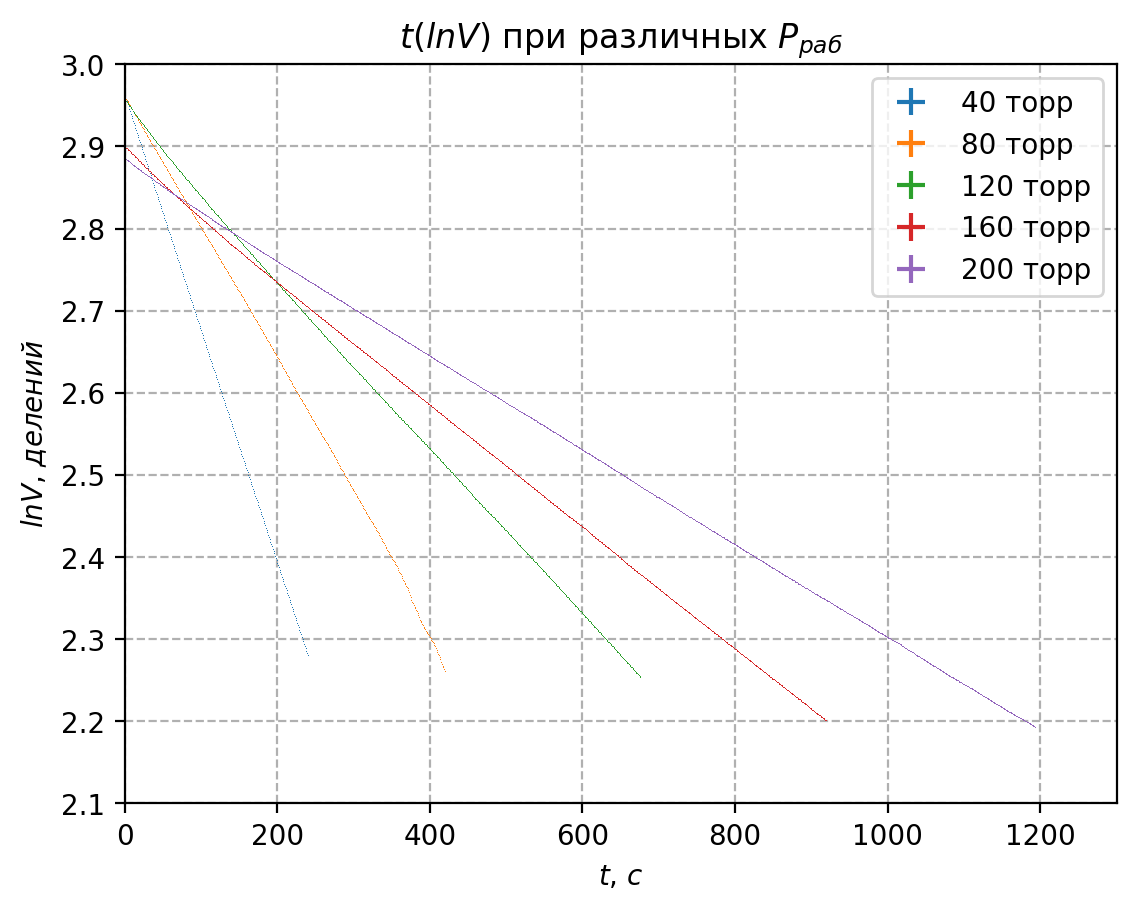

In [263]:
plt.xlabel("$t$, $с$")
plt.ylabel("$lnV$, $делений$") 
plt.title("$t(lnV)$ при различных $P_{раб}$")
plt.grid(True, linestyle="--")
plt.axis([0, 1300, 2.1, 3])

slope = []
errors = []

tab = table[0:241]
plt.errorbar(x=tab["t"], y=tab["lnV"], xerr=0, yerr=0, fmt=",", label='40 торр')
coefficients, cov_matrix = np.polyfit(tab["t"], tab["lnV"], 1, cov = True)
slope.append(coefficients[0])
errors.append(np.sqrt(np.diag(cov_matrix))[0])

tab = table[242:663]
plt.errorbar(x=tab["t"], y=tab["lnV"], xerr=0, yerr=0, fmt=",", label='80 торр')
coefficients, cov_matrix = np.polyfit(tab["t"], tab["lnV"], 1, cov = True)
slope.append(coefficients[0])
errors.append(np.sqrt(np.diag(cov_matrix))[0])

tab = table[664:1341]
plt.errorbar(x=tab["t"], y=tab["lnV"], xerr=0, yerr=0, fmt=",", label='120 торр')
coefficients, cov_matrix = np.polyfit(tab["t"], tab["lnV"], 1, cov = True)
slope.append(coefficients[0])
errors.append(np.sqrt(np.diag(cov_matrix))[0])

tab = table[1342:2262]
plt.errorbar(x=tab["t"], y=tab["lnV"], xerr=0, yerr=0, fmt=",", label='160 торр')
coefficients, cov_matrix = np.polyfit(tab["t"], tab["lnV"], 1, cov = True)
slope.append(coefficients[0])
errors.append(np.sqrt(np.diag(cov_matrix))[0])

tab = table[2262:3682]
plt.errorbar(x=tab["t"], y=tab["lnV"], xerr=0, yerr=0, fmt=",", label='200 торр')
coefficients, cov_matrix = np.polyfit(tab["t"], tab["lnV"], 1, cov = True)
slope.append(coefficients[0])
errors.append(np.sqrt(np.diag(cov_matrix))[0])
print(slope)
print(errors)

plt.legend()
plt.show()

In [264]:
data = {'slope': slope,
        'slope_error': errors,
        'P': [40, 80.6, 120, 160, 202.5]}
df = pd.DataFrame(data)

df['D'] = - df['slope'] * V / 2 * L_S
df['dD'] = df['D'] * np.sqrt((dV/V)**2 + (dL_S/L_S)**2 + (df['slope_error']/df['slope']))
df['1_P'] = 1 / df['P']
df['d1_P'] = df['1_P'] * (dP/df['P'])

df['eps'] = df['dD'] / df['D'] * 100
print(df)

      slope   slope_error      P         D        dD       1_P      d1_P  \
0 -0.002841  7.892761e-07   40.0  9.375223  0.870011  0.025000  0.002187   
1 -0.001630  2.100535e-06   80.6  5.377378  0.468801  0.012407  0.000539   
2 -0.001022  7.725636e-07  120.0  3.371421  0.304050  0.008333  0.000243   
3 -0.000750  3.512932e-07  160.0  2.476341  0.227248  0.006250  0.000137   
4 -0.000575  1.540435e-07  202.5  1.897699  0.176206  0.004938  0.000085   

        eps  
0  9.279895  
1  8.718028  
2  9.018462  
3  9.176778  
4  9.285251  


In [265]:
print(df[['P','D']].to_latex())

\begin{tabular}{lrr}
\toprule
{} &      P &         D \\
\midrule
0 &   40.0 &  9.375223 \\
1 &   80.6 &  5.377378 \\
2 &  120.0 &  3.371421 \\
3 &  160.0 &  2.476341 \\
4 &  202.5 &  1.897699 \\
\bottomrule
\end{tabular}



C:\Users\konop\AppData\Local\Temp\ipykernel_17884\1631347615.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df[['P','D']].to_latex())


0.0026687241942034918
0.000148503296214953


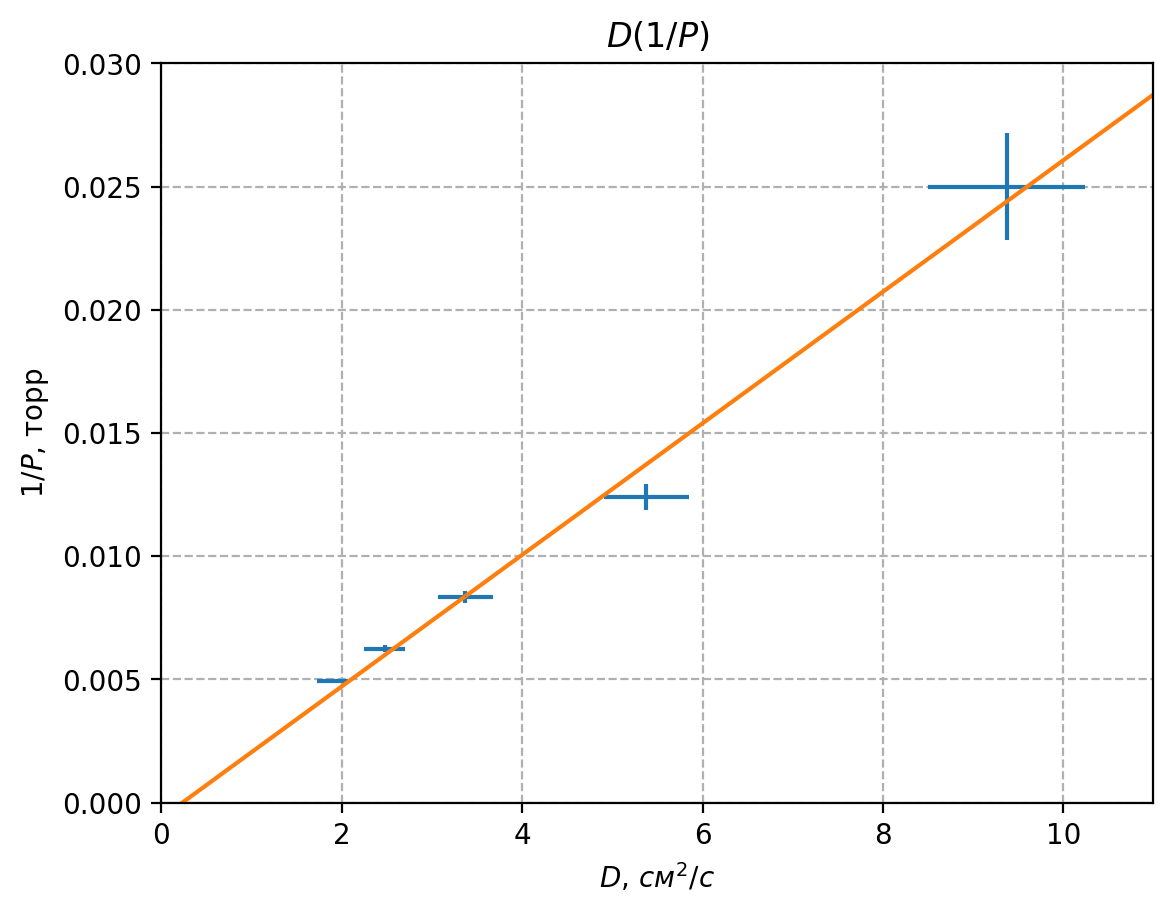

In [266]:
table1 = df
plt.xlabel("$D$, $см^2/с$")
plt.ylabel("$1/P$, торр") 
plt.title('$D(1/P)$')
plt.grid(True, linestyle="--")
plt.axis([0, 11, 0, 0.03])

plt.errorbar(x=table1['D'], y=table1['1_P'], xerr=table1['dD'], yerr=table1['d1_P'], fmt=",")
coefficients, cov_matrix = np.polyfit(table1['D'], table1['1_P'], 1, cov = True)
slope = coefficients[0]
error = np.sqrt(np.diag(cov_matrix))[0]
print(slope)
print(error)

poly = np.poly1d(coefficients)
x = np.linspace(0, 312, 100)
plt.plot(x, poly(x))
plt.show()

In [267]:
D_atm = (1 / 760 - coefficients[1]) / slope
dD_atm = (error / slope) * D_atm
print(D_atm)
print(dD_atm)

lamb = 3 * D_atm * np.sqrt(pi * nu / (8 * R * T))
dlamb = lamb * (dD_atm / D_atm)
print(lamb)
print(dlamb)

0.7263033188088963
0.04041573015647368
0.0017291312922248984
9.621889629567272e-05
